In [1]:
%matplotlib widget

In [ ]:
import sys
sys.path.append('../..')
from lcs import SRC_ROOT

In [2]:
import os
os.environ['ENABLE_PJRT_COMPATIBILITY'] = '1'
import jax
jax.config.update('jax_platform_name', 'cpu')
from lcs.configs import *
from lcs.joint_learning import *
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from lcs.configs import *
from scipy.optimize import curve_fit
from lcs.plotting_utils import make_cosyne_fig
from matplotlib.ticker import AutoMinorLocator, FixedLocator, MultipleLocator
from lcs.plotting_utils import fill_between
from lcs.utils import get_adapt
import matplotlib.pyplot as plt
from lcs import TEXTWIDTH

In [ ]:
logger = logging.getLogger('lcs')
logger.setLevel(logging.INFO)

# some minor overrides
in_size = 30
out_size = 30
overrides = dict(num_seeds=1, input_size=in_size, output_size=out_size, c_tau=.1, W_tau=.5, t_tot=100,
                regularization_strength=0.1,  
                log_aux=False)
cfg_dict = dict()

In [4]:
d_teachers = np.linspace(2, min(in_size, out_size), 10).astype(int)

# diable logger
logger = logging.getLogger('lcs')
logger.setLevel(logging.WARNING)

W_teachers = []
for d in d_teachers:

    W, (U, S, VT) = generate_teachers(in_size, out_size, 2, mode='svd', return_svd=True, svd_kwargs=dict(scale=1.
                                                                                                        #  /np.sqrt(in_size)
                                                                                                         ))
    S = np.array(S)
    S[..., d:] = 0.

    W_teachers_ = np.array([U[p] @ np.diag(S[p, ...]) @ VT[p] for p in range(U.shape[0])])

    U_, S_, VT_ = np.linalg.svd(W_teachers_, full_matrices=False)
    W_teachers.append(W_teachers_)

[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
(2, 30, 30)
[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
(2, 30, 30)
[[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
(2, 30, 30)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
(2, 30, 30)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.

In [5]:
cfgs = [Config(**dict(cfg_full_ | overrides, W_teachers=W_teachers_)) for W_teachers_ in W_teachers]
tapes = [run_config(cfg) for cfg in tqdm(cfgs)]

# re-enable logger
logger = logging.getLogger('lcs')

True


  0%|          | 0/10 [00:00<?, ?it/s]/Users/jan/learning-context-sensing/.venv/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:6217: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  start = asarray(start, dtype=computation_dtype)
/Users/jan/learning-context-sensing/.venv/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:6218: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  stop = asarray(stop, dtype=computation_dtype)
/Users/jan/learning-context-sensing/.venv/lib/

[WARNING] [2024-10-25 23:10:14,206] in lcs.joint_learning: grad norm c1 x lr is too large at 0.1299075037240982, not operating in Gradient Flow regime. Consider reducing dt=0.001000. 


 30%|███       | 3/10 [01:06<02:36, 22.34s/it]

[WARNING] [2024-10-25 23:10:37,858] in lcs.joint_learning: grad norm c1 x lr is too large at 0.1848495453596115, not operating in Gradient Flow regime. Consider reducing dt=0.001000. 


 40%|████      | 4/10 [01:30<02:17, 22.93s/it]

[WARNING] [2024-10-25 23:11:01,968] in lcs.joint_learning: grad norm c1 x lr is too large at 0.2932703495025635, not operating in Gradient Flow regime. Consider reducing dt=0.001000. 


 50%|█████     | 5/10 [01:54<01:57, 23.41s/it]

[WARNING] [2024-10-25 23:11:25,948] in lcs.joint_learning: grad norm c1 x lr is too large at 0.31088361144065857, not operating in Gradient Flow regime. Consider reducing dt=0.001000. 


 60%|██████    | 6/10 [02:19<01:34, 23.68s/it]

[WARNING] [2024-10-25 23:11:48,676] in lcs.joint_learning: grad norm c1 x lr is too large at 0.31088361144065857, not operating in Gradient Flow regime. Consider reducing dt=0.001000. 


 70%|███████   | 7/10 [02:42<01:10, 23.51s/it]

[WARNING] [2024-10-25 23:12:13,071] in lcs.joint_learning: grad norm c1 x lr is too large at 0.31088361144065857, not operating in Gradient Flow regime. Consider reducing dt=0.001000. 


 80%|████████  | 8/10 [03:06<00:47, 23.72s/it]

[WARNING] [2024-10-25 23:12:37,936] in lcs.joint_learning: grad norm c1 x lr is too large at 0.31088361144065857, not operating in Gradient Flow regime. Consider reducing dt=0.001000. 


 90%|█████████ | 9/10 [03:31<00:24, 24.16s/it]

[WARNING] [2024-10-25 23:13:03,853] in lcs.joint_learning: grad norm c1 x lr is too large at 0.31088361144065857, not operating in Gradient Flow regime. Consider reducing dt=0.001000. 


100%|██████████| 10/10 [03:57<00:00, 23.72s/it]


0.001
22.809921
22.809921
22.809921
22.809921
22.809921
22.809921
22.809921
22.809921
22.809921
22.809921
22.809921
0.001
53.86266
53.86266
53.86266
53.86266
53.86266
53.86266
53.86266
53.86266
53.86266
53.86266
53.86266
0.001
94.15441
94.15441
94.15441
94.15441
94.15441
94.15441
94.15441
94.15441
94.15441
94.15441
94.15441
0.001
131.14035
131.14035
131.14035
131.14035
131.14035
131.14035
131.14035
131.14035
131.14035
131.14035
131.14035
0.001
233.7962
233.7962
233.7962
233.7962
233.7962
233.7962
233.7962
233.7962
233.7962
233.7962
233.7962
0.001
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
0.001
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
0.001
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
0.001
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
245.5917
0.001
245.5917
245.5917
245.5917


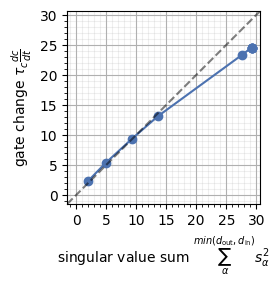

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(TEXTWIDTH / 2, TEXTWIDTH / 2), layout='constrained')
# show axes spines

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
lb = len(tapes[0]['cos_sim1']) // 8

@partial(np.vectorize, signature='(t),(t),(t, p),(),()->(n),(n),(n)')
def get_first_crossing_times(loss, c_gt1, c, cfg, thsd=0.1):
    ti_switches = np.where(np.abs(np.gradient(c_gt1,  cfg.dt_tape)) > 0.2)[0] + 1

    ti_switches = ti_switches[int(len(ti_switches) * 9/10):]  # only at convergence

    losses_blocks = np.split(loss, ti_switches)
    losses_blocks = [loss_block for loss_block in losses_blocks if len(loss_block) > 2]


    c_blocks = np.split(c, ti_switches)
    c_blocks = [c for c_block in c_blocks if len(c_block) > 2]

    blocks = np.arange(1, len(losses_blocks)+1)

    loss_grads = []
    for loss_block in losses_blocks:
        loss_grad = np.abs(np.gradient(loss_block, cfg.dt_tape)).max()
        loss_grads.append(loss_grad)

    c_grads = []
    for c_block in c_blocks:
        c_grad = np.abs(np.gradient(c_block, cfg.dt_tape, axis=0)).max()
        c_grads.append(c_grad)

    loss_grads = np.array(loss_grads)
    c_grads = np.array(c_grads)
    return blocks, loss_grads, c_grads

get_first_crossing_times_ = partial(get_first_crossing_times, thsd=.2)

loss_grads = []
c_grads = []
for cfg, tape in zip(cfgs, tapes):
    blocks, loss_grad, c_grad = get_first_crossing_times_(tape.loss, tape.c_gt1, tape.c1, cfg)  # (seeds, blocks n)
    
    loss_grads.append(np.mean(loss_grad, axis=1).squeeze())  # average over blocks
    c_grads.append(np.mean(c_grad, axis=1).squeeze())

c_grads = np.array(c_grads)

SVs_ = [np.linalg.svd(tape.W1[0, -3:, 0], compute_uv=False) for tape in tapes]
trc = [np.einsum('tij,tij->t', tape.W1[0, -3:, 0], tape.W1[0, -3:, 0]).mean() for tape in tapes]

sum_svs = [np.sum(SVs**2, axis=-1).mean(0) for SVs in SVs_]

lr = cfgs[0].c_tau ** -1
grad_fn = lambda W: np.einsum('pio,pio', W, W)

ax.plot(sum_svs, c_grads * cfgs[0].c_tau, c='C0', marker='o', label='theory')

# fit a linear function to c_grad
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a*x + b

ax.xaxis.set_minor_locator(MultipleLocator(1)) # tick every integer
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5)) # tick every integer
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.grid(which='minor', axis='both', alpha=0.2)
ax.grid(which='major', axis='both')

ax.axline((0, 0), slope=1, c='k', ls='--', alpha=0.5)

max_xy = np.max([np.max(sum_svs), np.max(c_grads * cfgs[0].c_tau)])
ax.dataLim.x1 = max_xy
ax.dataLim.y1 = max_xy

ax.set_aspect(1)
ax.set_xlabel(r"singular value sum $\sum_\alpha^{min(d_{\text{out}}, d_{\text{in}})} s_\alpha^2$")
ax.set_ylabel(r"gate change $\tau_c \frac{dc}{dt}$")

fig